<a href="https://colab.research.google.com/github/d93y70123123/AI/blob/master/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
model = tf.keras.applications.InceptionV3(include_top=True, weights='imagenet')

96116736/96112376 [==============================] - 1s 0us/step


In [17]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [18]:
model_tb = tf.keras.callbacks.TensorBoard(log_dir='lab8-logs-inceptionv3-keras')
model_tb.set_model(model)
! ls -l

total 4680
-rw-r--r-- 1 root root 4783815 Aug  4  2015 elephant.jpg
drwxr-xr-x 3 root root    4096 Apr 29 14:34 lab8-logs-inceptionv3-keras
drwxr-xr-x 1 root root    4096 Apr  3 16:24 sample_data


In [0]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import decode_predictions

In [0]:
def read_img(img_path, resize=(299,299)):
    img_string = tf.io.read_file(img_path)  # 讀取檔案
    img_decode = tf.image.decode_image(img_string)  # 將檔案以影像格式來解碼
    img_decode = tf.image.resize(img_decode, resize)  # 將影像resize到網路輸入大小
    # 將影像格式增加到4維(batch, height, width, channels)，模型預測要求格式
    img_decode = tf.expand_dims(img_decode, axis=0)
    return img_decode

--2020-04-29 14:36:07--  https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4783815 (4.6M) [image/jpeg]
Saving to: ‘elephant.jpg’

elephant.jpg        100%[===================>]   4.56M  10.6MB/s    in 0.4s    

2020-04-29 14:36:07 (10.6 MB/s) - ‘elephant.jpg’ saved [4783815/4783815]



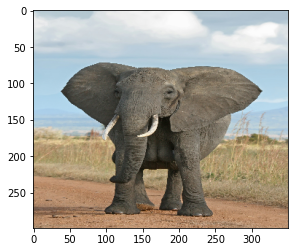

In [15]:
! wget 'https://upload.wikimedia.org/wikipedia/commons/3/37/African_Bush_Elephant.jpg' -O elephant.jpg
img_path = './elephant.jpg'
img = read_img(img_path)  # 透過剛創建的函式讀取影像
plt.imshow(tf.cast(img, tf.uint8)[0])  # 透過matplotlib顯示圖片需將影像轉為Integers

In [16]:
img = preprocess_input(img)  # 影像前處理
preds = model.predict(img)  # 預測圖片
print("Predicted:", decode_predictions(preds, top=3)[0])  # 輸出預測最高的三個類別

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.5637232), ('n01871265', 'tusker', 0.14336641), ('n02504013', 'Indian_elephant', 0.0069124256)]
